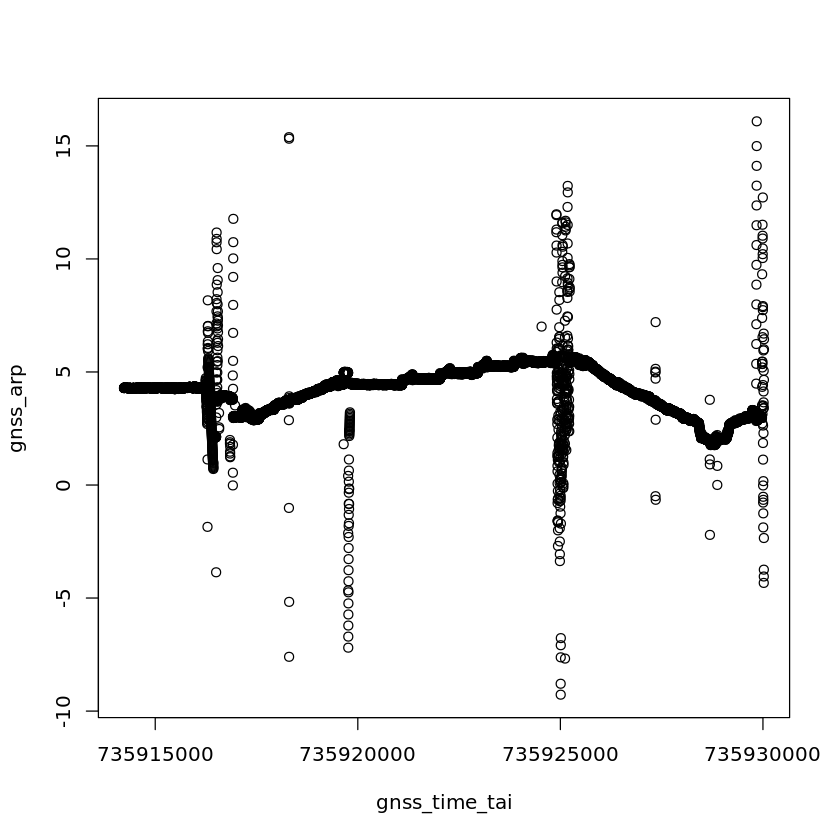

In [59]:
library(ncdf4)
library(ggplot2)
library(dplyr)
gnss_nc= nc_open('/nas/cee-water/cjgleason/calval/Processed data/UMass/From Andy/UMass_netCDFs/SWOTCalVal_CR_GNSS_L2_Rec1_20230427T123631_20230427T174521_20230501T170448.nc')
  gnss_wse= ncvar_get(gnss_nc,'wse')
  gnss_time_tai=ncvar_get(gnss_nc,'time_tai')
  gnss_arp=ncvar_get(gnss_nc,'height_arp')
gnss_offset=ncvar_get(gnss_nc,'height_offset_cor')

plot(gnss_time_tai,gnss_arp)
dataframe_in=read.csv('/nas/cee-water/cjgleason/calval/Processed data/UMass/Munged drifts/reprocessed_2023_05_09/SWOTCalVal_CR_GNSS_L2_Rec1_20230427T123631_20230427T174521_20230501T170448.csv')%>%
mutate(gnss_time_UTC=as.POSIXct(gnss_time_UTC))

In [60]:
# test=list.files('/nas/cee-water/cjgleason/calval/Processed data/UMass/Munged drifts/reprocessed_05_01_23',full.names = TRUE)

#  test2=file.info(test)%>%
#  mutate(mintime= Sys.time()-mtime) %>%
# filter(mintime== min(mintime)) 

# test
# test2
# row.names(test2)


# gnss_nc


In [52]:
#   gnss_motion_flag  =ncvar_get(gnss_nc,'motioncode_flag')
#   gnss_surf_flag  =ncvar_get(gnss_nc,'surfacetype_flag')

# test=data.frame(motion=gnss_motion_flag,surf=gnss_surf_flag)%>%
# filter(motion == 1 & surf ==12)

# test

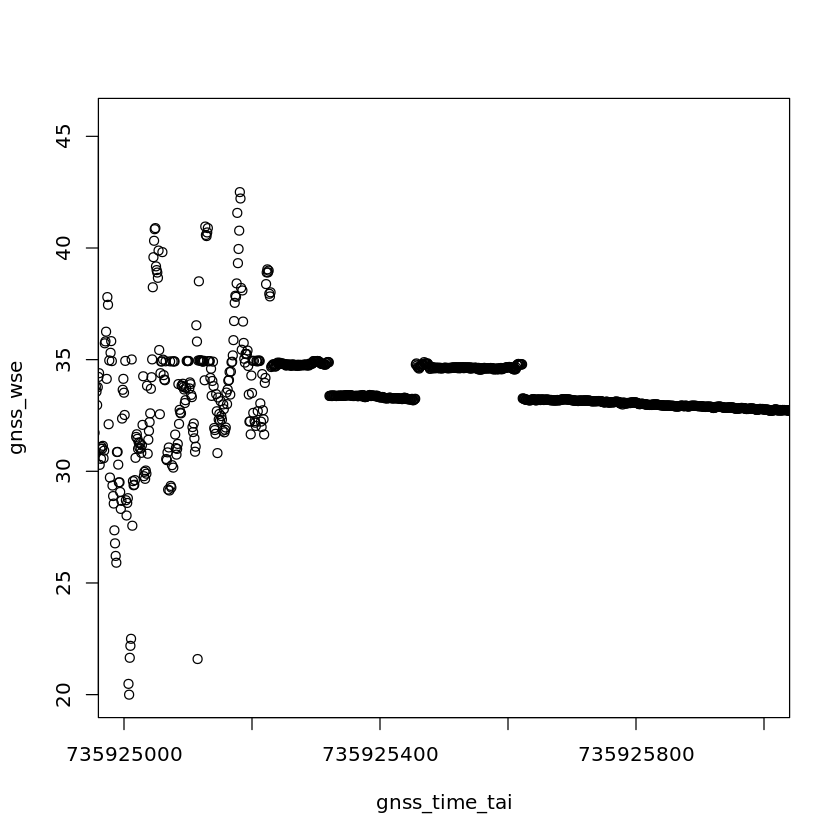

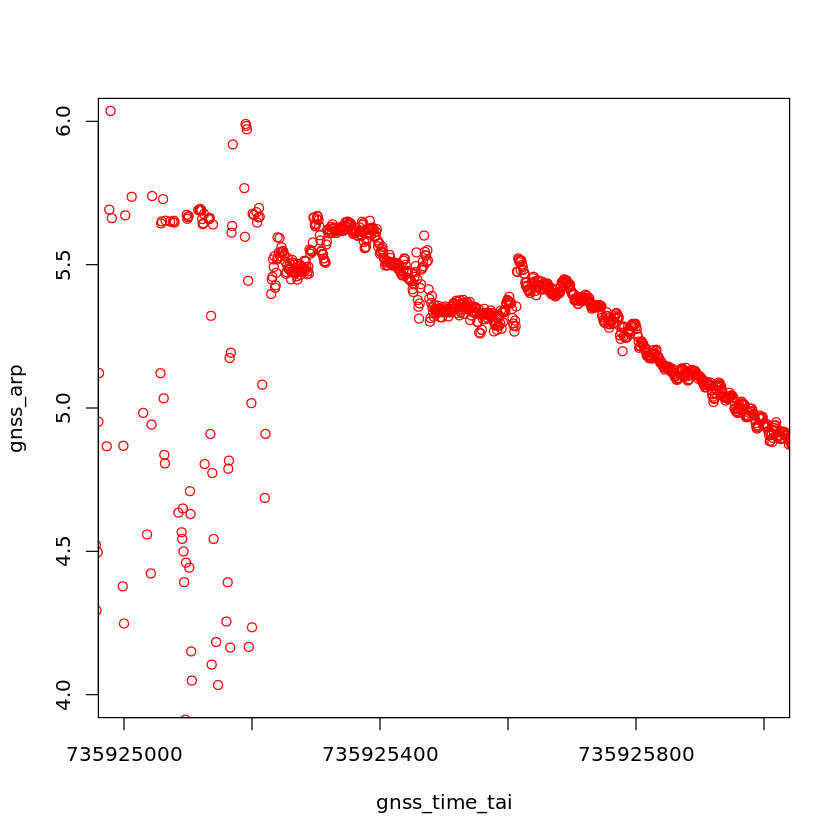

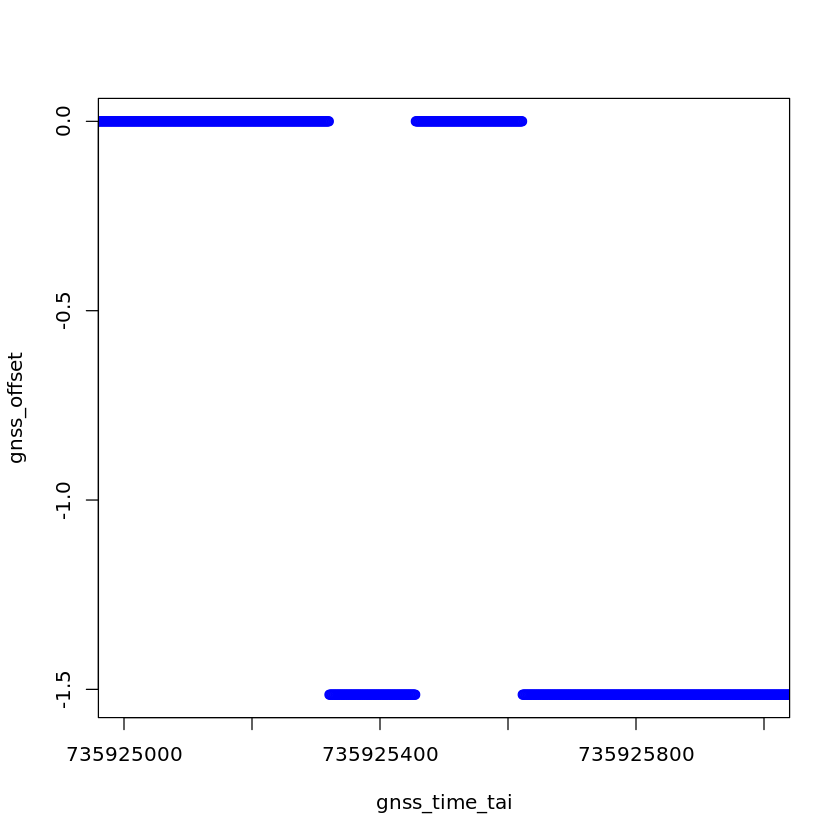

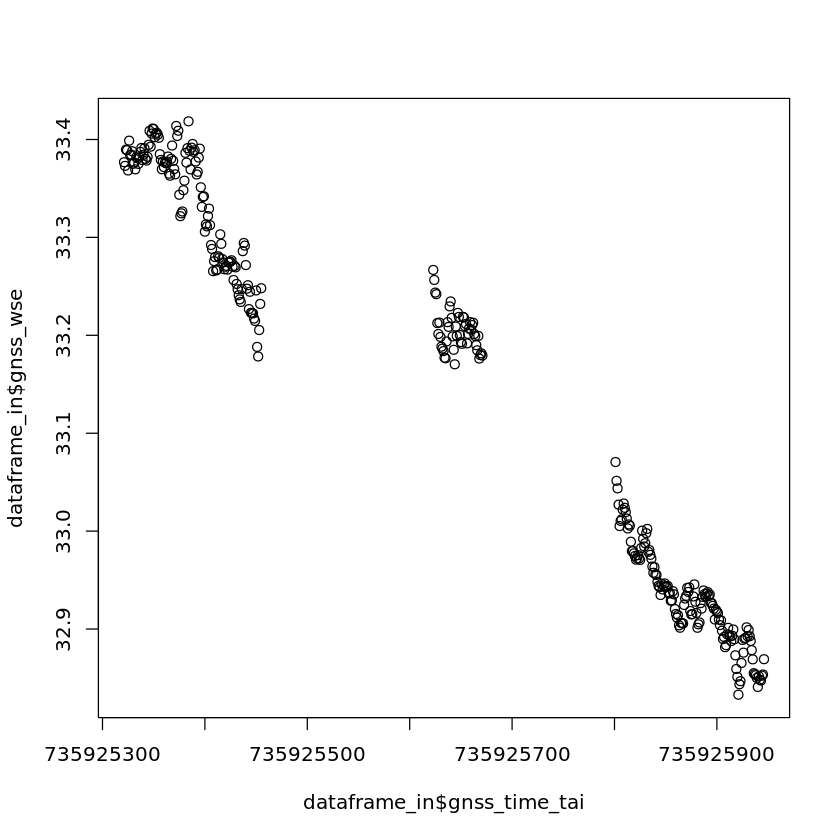

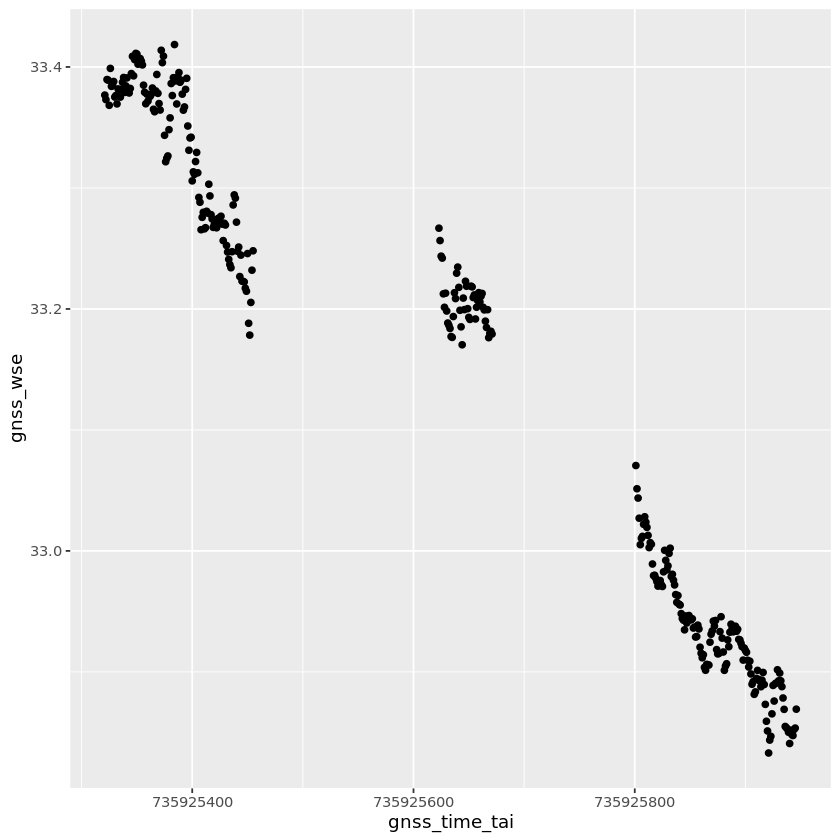

In [80]:
plot(gnss_time_tai,gnss_wse,xlim=c(735925000,735926000))
plot(gnss_time_tai,gnss_arp,col='red',ylim=c(4,6),xlim=c(735925000,735926000))
plot(gnss_time_tai,gnss_offset,col='blue',xlim=c(735925000,735926000))
#head(dataframe_in)

dataframe_in=dataframe_in%>%
filter(gnss_time_tai > 735925000) %>%
filter(gnss_time_tai < 735926000)

plot(dataframe_in$gnss_time_tai, dataframe_in$gnss_wse)

test=ggplot(dataframe_in) +
geom_point(aes(x=gnss_time_tai,y=gnss_wse))#+
#scale_x_continuous(breaks = seq(min(dataframe_in$gnss_time_UTC),max(dataframe_in$gnss_time_UTC),length.out=20))#+
#theme(axis.text.x = element_text(face="bold", color="#993333",angle=90,vjust=0.5,hjust=0))
plot(test)

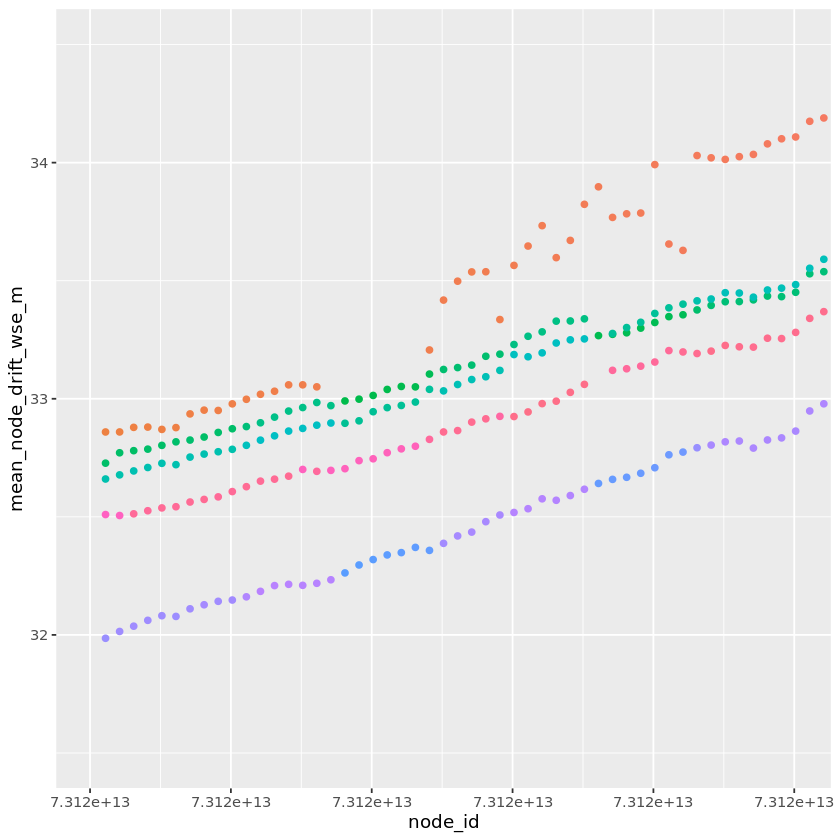

In [3]:
dataframe_in=read.csv('/nas/cee-water/cjgleason/calval/Processed data/UMass/Data frames/node/CR_drift_node_wses.csv')#%>%
# filter(reach_id==73120000171)%>%
# select(mean_reach_drift_wse_m,wse_drift_start_UTC)

test=ggplot(dataframe_in)+
geom_point(aes(x=node_id,y=mean_node_drift_wse_m,col=time_UTC))+
 theme(legend.position='none')+
coord_cartesian(xlim=c(73120000180001,73120000180501),ylim=c(31.5,34.5))

#head(dataframe_in)
plot(test)